## 1. Giới Thiệu Bài Toán <a id='1-gioi-thieu'></a>

### 1.1. Bối cảnh
Starbucks gửi các chương trình khuyến mãi (offers) qua ứng dụng di động đến khách hàng. Mục tiêu là dự đoán hành vi của khách hàng khi nhận được các offers này.

### 1.2. Các loại hành vi (Target Classes)
- **Class 0:** Offer received - Khách hàng nhận được offer
- **Class 1:** Offer viewed - Khách hàng xem offer
- **Class 2:** Transaction - Giao dịch không sử dụng offer
- **Class 3:** Offer completed - Hoàn thành giao dịch với offer
- **Class 4:** Green flag - Giao dịch mà không cần offer (tiết kiệm chi phí marketing)

### 1.3. Dữ liệu
Gồm 3 file JSON:
- **portfolio.json:** Thông tin về các offers (loại, reward, độ khó, thời hạn)
- **profile.json:** Thông tin khách hàng (tuổi, giới tính, thu nhập, ngày đăng ký)
- **transcript.json:** Lịch sử tương tác của khách hàng với offers

## 2. Import Thư Viện <a id='2-import-thu-vien'></a>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import json

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')
sns.set_palette('husl')

print("✓ Import thư viện thành công")

✓ Import thư viện thành công


## 3. Tải Dữ Liệu <a id='3-tai-du-lieu'></a>

In [2]:
# Đường dẫn đến thư mục data
DATA_PATH = '../data/'

# Đọc dữ liệu từ các file JSON
portfolio = pd.read_json(DATA_PATH + 'portfolio.json', orient='records', lines=True)
profile = pd.read_json(DATA_PATH + 'profile.json', orient='records', lines=True)
transcript = pd.read_json(DATA_PATH + 'transcript.json', orient='records', lines=True)

print(f"Portfolio shape: {portfolio.shape}")
print(f"Profile shape: {profile.shape}")
print(f"Transcript shape: {transcript.shape}")
print("\n✓ Tải dữ liệu thành công")

Portfolio shape: (10, 6)
Profile shape: (17000, 5)
Transcript shape: (306534, 4)

✓ Tải dữ liệu thành công


## 4. Phân Tích Cấu Trúc Dữ Liệu <a id='4-phan-tich-cau-truc'></a>

### 4.1. Portfolio Data - Thông tin Offers

In [3]:
print("=" * 80)
print("PORTFOLIO DATA - THÔNG TIN CÁC CHƯƠNG TRÌNH KHUYẾN MÃI")
print("=" * 80)
print(f"\nSố lượng offers: {len(portfolio)}")
print(f"\nCác cột: {list(portfolio.columns)}")
print("\nThông tin chi tiết:")
portfolio.info()
print("\n5 dòng đầu tiên:")
display(portfolio.head())

PORTFOLIO DATA - THÔNG TIN CÁC CHƯƠNG TRÌNH KHUYẾN MÃI

Số lượng offers: 10

Các cột: ['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id']

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes

5 dòng đầu tiên:


,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
# Phân tích các loại offer
print("Phân bố loại offer:")
print(portfolio['offer_type'].value_counts())
print("\nThống kê reward, difficulty, duration:")
display(portfolio[['reward', 'difficulty', 'duration']].describe())

Phân bố loại offer:
offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

Thống kê reward, difficulty, duration:


,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


### 4.2. Profile Data - Thông tin Khách hàng

In [5]:
print("=" * 80)
print("PROFILE DATA - THÔNG TIN KHÁCH HÀNG")
print("=" * 80)
print(f"\nSố lượng khách hàng: {len(profile)}")
print(f"\nCác cột: {list(profile.columns)}")
print("\nThông tin chi tiết:")
profile.info()
print("\n5 dòng đầu tiên:")
display(profile.head())

PROFILE DATA - THÔNG TIN KHÁCH HÀNG

Số lượng khách hàng: 17000

Các cột: ['gender', 'age', 'id', 'became_member_on', 'income']

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB

5 dòng đầu tiên:


,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
# Kiểm tra missing values
print("Missing values trong Profile:")
print(profile.isnull().sum())
print(f"\nTỷ lệ missing: {profile.isnull().sum() / len(profile) * 100}%")

Missing values trong Profile:
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Tỷ lệ missing: gender              12.794118
age                  0.000000
id                   0.000000
became_member_on     0.000000
income              12.794118
dtype: float64%


In [7]:
# Thống kê mô tả
print("Thống kê về tuổi, thu nhập:")
display(profile[['age', 'income']].describe())
print("\nPhân bố giới tính:")
print(profile['gender'].value_counts())

Thống kê về tuổi, thu nhập:


,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000



Phân bố giới tính:
gender
M    8484
F    6129
O     212
Name: count, dtype: int64


### 4.3. Transcript Data - Lịch sử Tương tác

In [8]:
print("=" * 80)
print("TRANSCRIPT DATA - LỊCH SỬ TƯƠNG TÁC")
print("=" * 80)
print(f"\nSố lượng giao dịch: {len(transcript):,}")
print(f"\nCác cột: {list(transcript.columns)}")
print("\nThông tin chi tiết:")
transcript.info()
print("\n5 dòng đầu tiên:")
display(transcript.head())

TRANSCRIPT DATA - LỊCH SỬ TƯƠNG TÁC

Số lượng giao dịch: 306,534

Các cột: ['person', 'event', 'value', 'time']

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB

5 dòng đầu tiên:


,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [9]:
# Phân tích các loại event
print("Phân bố các loại event:")
print(transcript['event'].value_counts())
print("\nTỷ lệ phần trăm:")
print(transcript['event'].value_counts(normalize=True) * 100)

Phân bố các loại event:


event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

Tỷ lệ phần trăm:
event
transaction        45.330371
offer received     24.883700
offer viewed       18.831516
offer completed    10.954413
Name: proportion, dtype: float64


In [10]:
# Kiểm tra unique customers
unique_customers_transcript = transcript['person'].nunique()
unique_customers_profile = profile['id'].nunique()

print(f"Số khách hàng unique trong transcript: {unique_customers_transcript:,}")
print(f"Số khách hàng unique trong profile: {unique_customers_profile:,}")
print(f"\n✓ Khớp dữ liệu: {unique_customers_transcript == unique_customers_profile}")

Số khách hàng unique trong transcript: 17,000
Số khách hàng unique trong profile: 17,000

✓ Khớp dữ liệu: True


## 5. Phân Tích Thống Kê Mô Tả <a id='5-phan-tich-thong-ke'></a>

### 5.1. Phân tích cột 'value' trong Transcript

In [11]:
# Cột 'value' chứa dictionary, cần parse
print("Ví dụ về cấu trúc cột 'value':")
for i in range(5):
    print(f"Row {i}: {transcript.iloc[i]['value']}")

Ví dụ về cấu trúc cột 'value':
Row 0: {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
Row 1: {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
Row 2: {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Row 3: {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
Row 4: {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


### 5.2. Phân tích Demographic - Khách hàng

In [12]:
# Loại bỏ missing values để phân tích
profile_clean = profile.dropna()

print(f"Số khách hàng sau khi loại bỏ missing: {len(profile_clean):,}")
print(f"Tỷ lệ dữ liệu giữ lại: {len(profile_clean)/len(profile)*100:.2f}%")

Số khách hàng sau khi loại bỏ missing: 14,825
Tỷ lệ dữ liệu giữ lại: 87.21%


In [13]:
# Thống kê chi tiết về age
print("THỐNG KÊ VỀ TUỔI:")
print(f"Trung bình: {profile_clean['age'].mean():.2f} tuổi")
print(f"Trung vị: {profile_clean['age'].median():.2f} tuổi")
print(f"Độ lệch chuẩn: {profile_clean['age'].std():.2f}")
print(f"Min: {profile_clean['age'].min()}, Max: {profile_clean['age'].max()}")

THỐNG KÊ VỀ TUỔI:
Trung bình: 54.39 tuổi
Trung vị: 55.00 tuổi
Độ lệch chuẩn: 17.38
Min: 18, Max: 101


In [14]:
# Thống kê chi tiết về income
print("THỐNG KÊ VỀ THU NHẬP:")
print(f"Trung bình: ${profile_clean['income'].mean():,.2f}")
print(f"Trung vị: ${profile_clean['income'].median():,.2f}")
print(f"Độ lệch chuẩn: ${profile_clean['income'].std():,.2f}")
print(f"Min: ${profile_clean['income'].min():,.2f}")
print(f"Max: ${profile_clean['income'].max():,.2f}")

THỐNG KÊ VỀ THU NHẬP:
Trung bình: $65,404.99
Trung vị: $64,000.00
Độ lệch chuẩn: $21,598.30
Min: $30,000.00
Max: $120,000.00


## 6. Trực Quan Hóa Dữ Liệu <a id='6-truc-quan-hoa'></a>

### 6.1. Phân bố Event Types

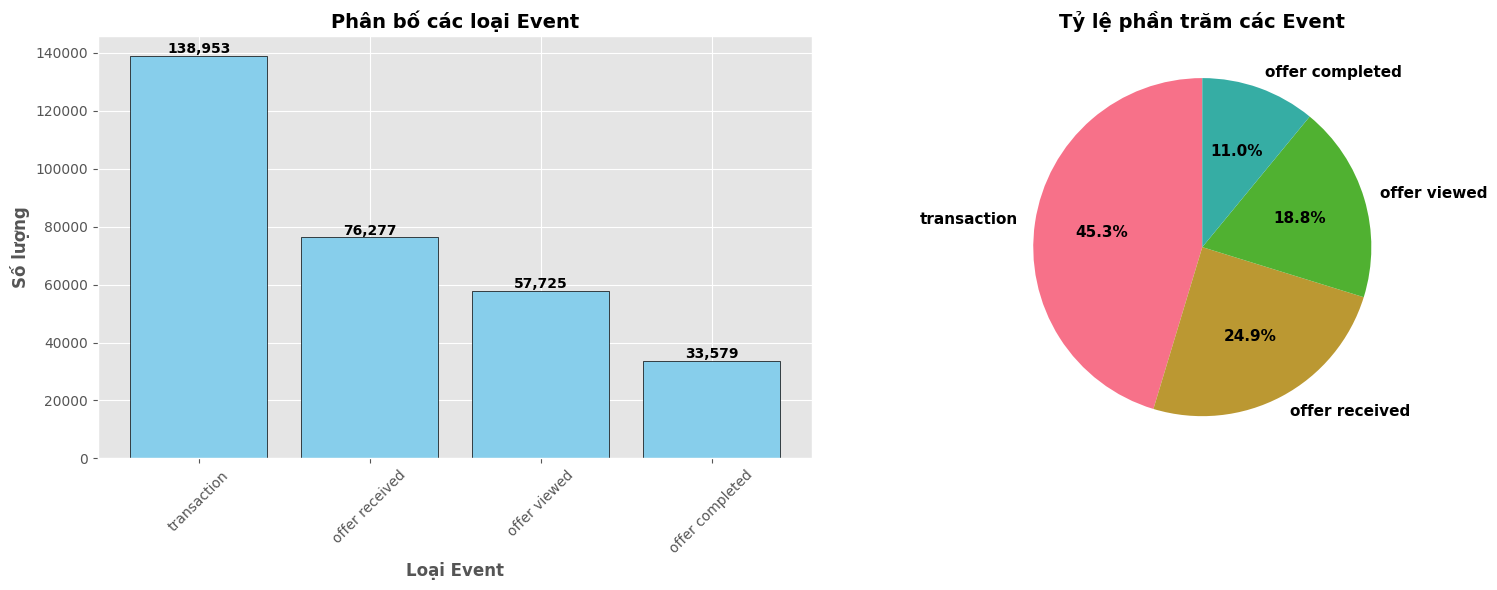

✓ Đã lưu biểu đồ: 01_event_distribution.png


In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
event_counts = transcript['event'].value_counts()
ax[0].bar(event_counts.index, event_counts.values, color='skyblue', edgecolor='black')
ax[0].set_xlabel('Loại Event', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax[0].set_title('Phân bố các loại Event', fontsize=14, fontweight='bold')
ax[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(event_counts.values):
    ax[0].text(i, v + 1000, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
ax[1].pie(event_counts.values, labels=event_counts.index, autopct='%1.1f%%', 
          startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax[1].set_title('Tỷ lệ phần trăm các Event', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/01_event_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Đã lưu biểu đồ: 01_event_distribution.png")

### 6.2. Phân bố Demographic - Age và Income

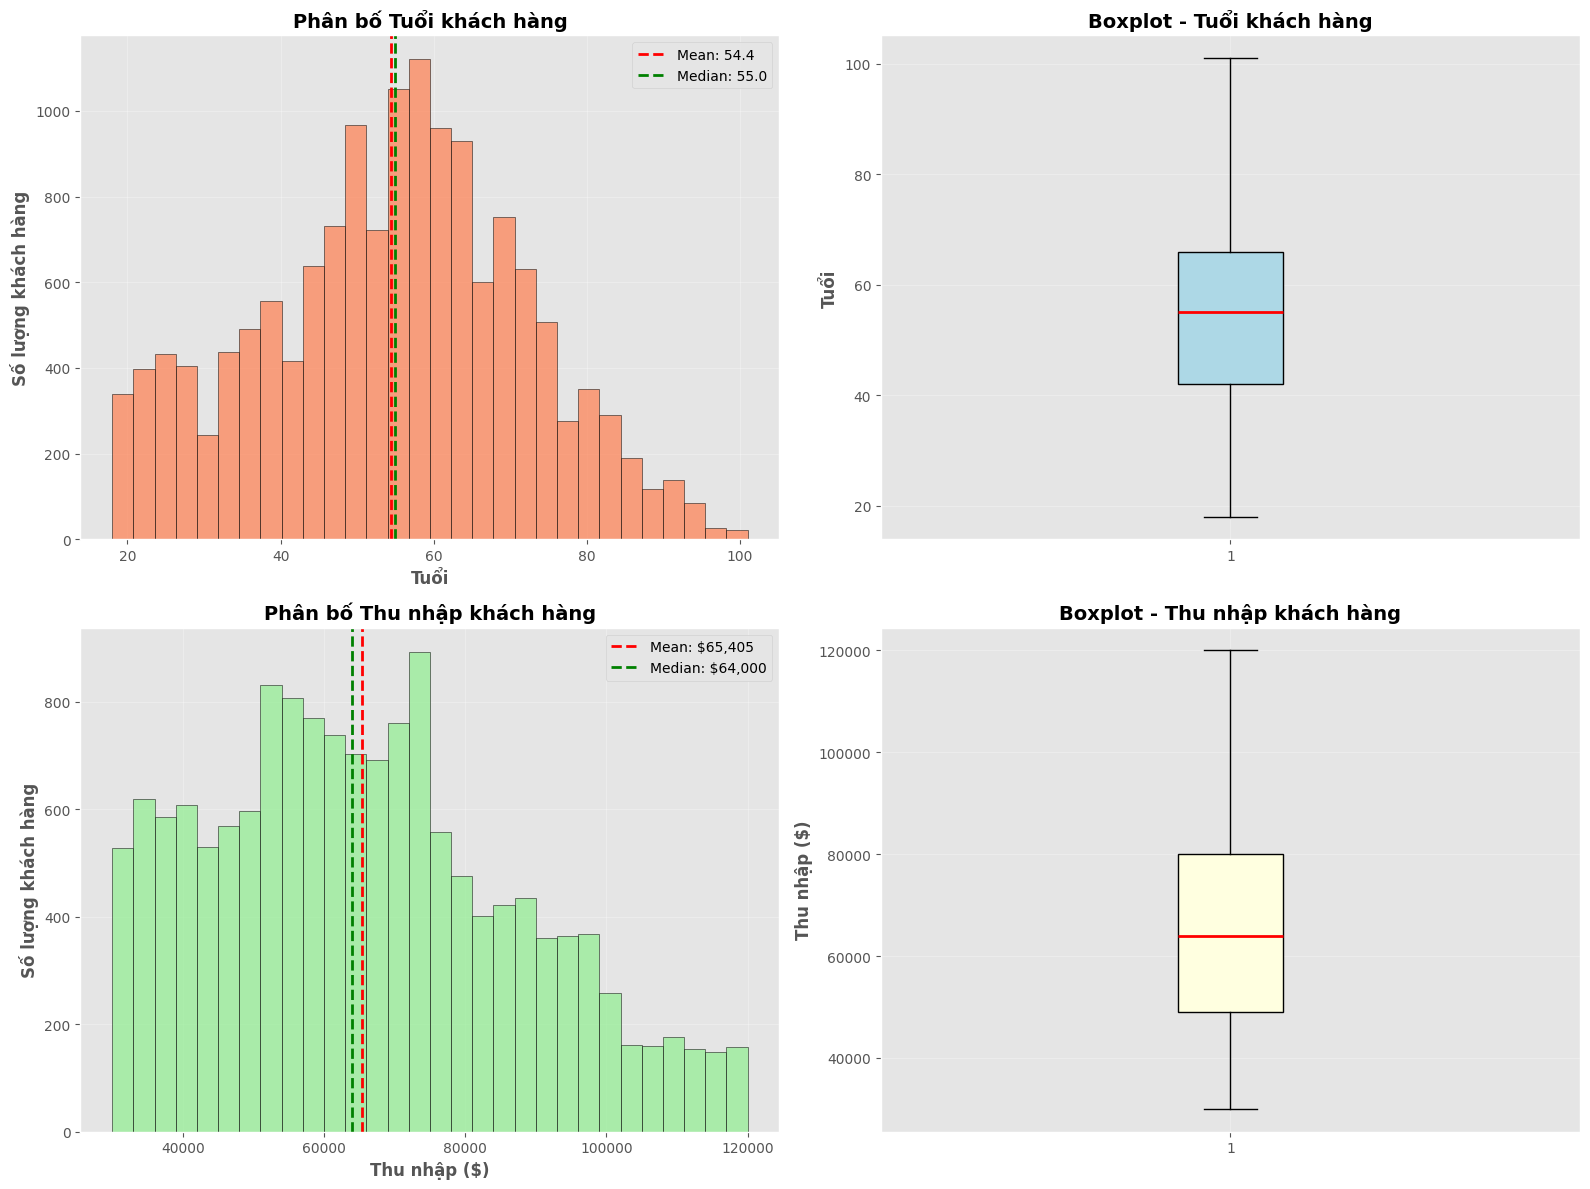

✓ Đã lưu biểu đồ: 02_demographic_distribution.png


In [16]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Age histogram
ax[0, 0].hist(profile_clean['age'], bins=30, color='coral', edgecolor='black', alpha=0.7)
ax[0, 0].axvline(profile_clean['age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {profile_clean["age"].mean():.1f}')
ax[0, 0].axvline(profile_clean['age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {profile_clean["age"].median():.1f}')
ax[0, 0].set_xlabel('Tuổi', fontsize=12, fontweight='bold')
ax[0, 0].set_ylabel('Số lượng khách hàng', fontsize=12, fontweight='bold')
ax[0, 0].set_title('Phân bố Tuổi khách hàng', fontsize=14, fontweight='bold')
ax[0, 0].legend()
ax[0, 0].grid(True, alpha=0.3)

# Age boxplot
ax[0, 1].boxplot(profile_clean['age'], vert=True, patch_artist=True,
                 boxprops=dict(facecolor='lightblue'),
                 medianprops=dict(color='red', linewidth=2))
ax[0, 1].set_ylabel('Tuổi', fontsize=12, fontweight='bold')
ax[0, 1].set_title('Boxplot - Tuổi khách hàng', fontsize=14, fontweight='bold')
ax[0, 1].grid(True, alpha=0.3)

# Income histogram
ax[1, 0].hist(profile_clean['income'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
ax[1, 0].axvline(profile_clean['income'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${profile_clean["income"].mean():,.0f}')
ax[1, 0].axvline(profile_clean['income'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${profile_clean["income"].median():,.0f}')
ax[1, 0].set_xlabel('Thu nhập ($)', fontsize=12, fontweight='bold')
ax[1, 0].set_ylabel('Số lượng khách hàng', fontsize=12, fontweight='bold')
ax[1, 0].set_title('Phân bố Thu nhập khách hàng', fontsize=14, fontweight='bold')
ax[1, 0].legend()
ax[1, 0].grid(True, alpha=0.3)

# Income boxplot
ax[1, 1].boxplot(profile_clean['income'], vert=True, patch_artist=True,
                 boxprops=dict(facecolor='lightyellow'),
                 medianprops=dict(color='red', linewidth=2))
ax[1, 1].set_ylabel('Thu nhập ($)', fontsize=12, fontweight='bold')
ax[1, 1].set_title('Boxplot - Thu nhập khách hàng', fontsize=14, fontweight='bold')
ax[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/02_demographic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Đã lưu biểu đồ: 02_demographic_distribution.png")

### 6.3. Phân bố Giới tính

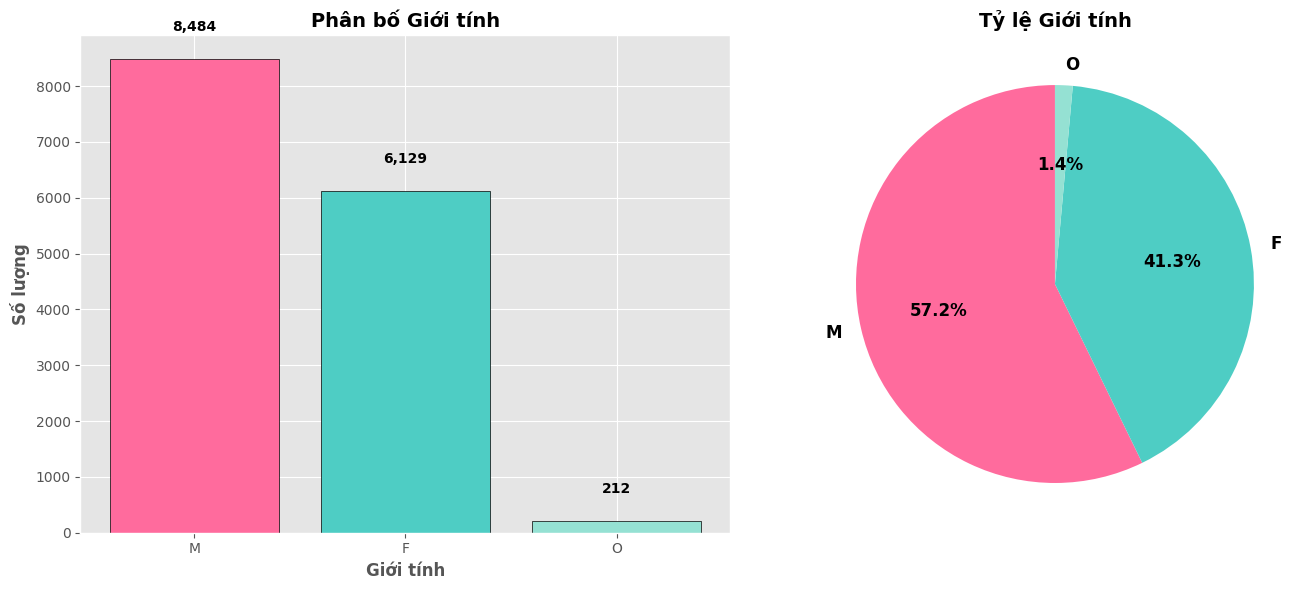

✓ Đã lưu biểu đồ: 03_gender_distribution.png


In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

gender_counts = profile_clean['gender'].value_counts()

# Bar chart
ax[0].bar(gender_counts.index, gender_counts.values, color=['#FF6B9D', '#4ECDC4', '#95E1D3'], edgecolor='black')
ax[0].set_xlabel('Giới tính', fontsize=12, fontweight='bold')
ax[0].set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax[0].set_title('Phân bố Giới tính', fontsize=14, fontweight='bold')
for i, v in enumerate(gender_counts.values):
    ax[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
ax[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
          colors=['#FF6B9D', '#4ECDC4', '#95E1D3'], startangle=90,
          textprops={'fontsize': 12, 'fontweight': 'bold'})
ax[1].set_title('Tỷ lệ Giới tính', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/03_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Đã lưu biểu đồ: 03_gender_distribution.png")

### 6.4. Portfolio - Offers Analysis

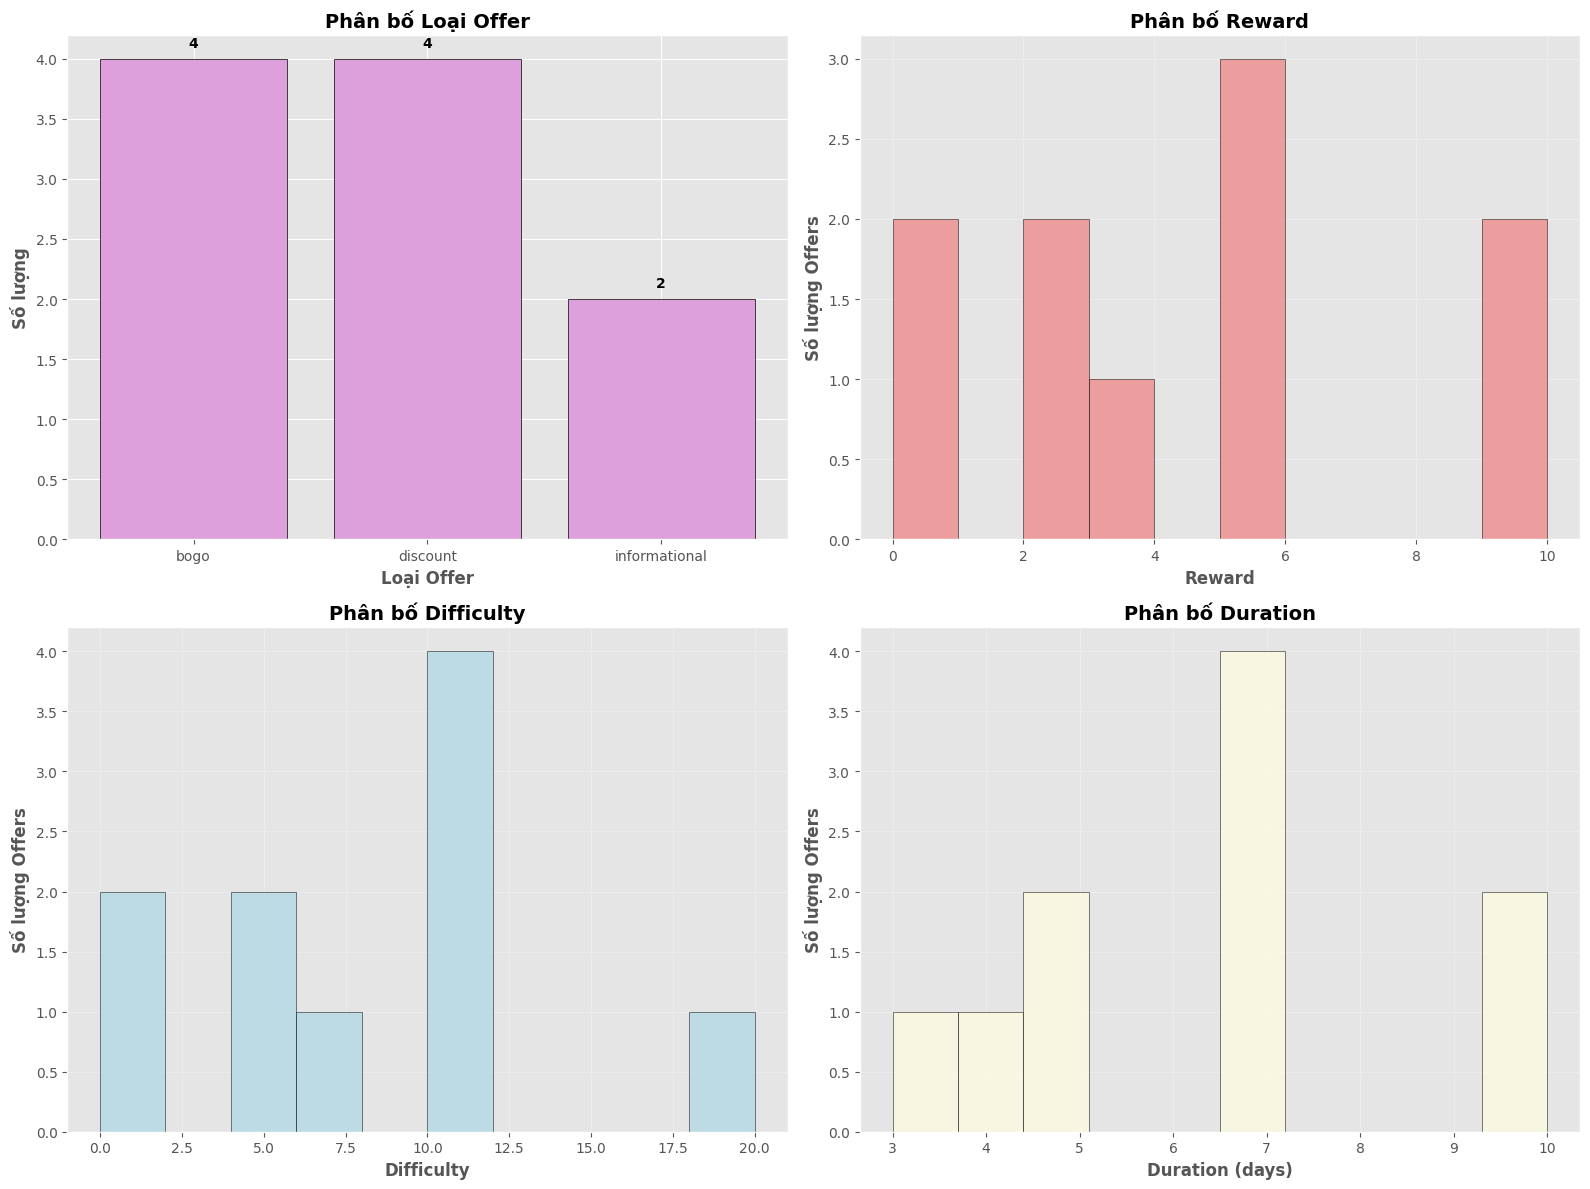

✓ Đã lưu biểu đồ: 04_portfolio_analysis.png


In [18]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Offer types
offer_types = portfolio['offer_type'].value_counts()
ax[0, 0].bar(offer_types.index, offer_types.values, color='plum', edgecolor='black')
ax[0, 0].set_xlabel('Loại Offer', fontsize=12, fontweight='bold')
ax[0, 0].set_ylabel('Số lượng', fontsize=12, fontweight='bold')
ax[0, 0].set_title('Phân bố Loại Offer', fontsize=14, fontweight='bold')
for i, v in enumerate(offer_types.values):
    ax[0, 0].text(i, v + 0.1, str(v), ha='center', fontweight='bold')

# Reward distribution
ax[0, 1].hist(portfolio['reward'], bins=10, color='lightcoral', edgecolor='black', alpha=0.7)
ax[0, 1].set_xlabel('Reward', fontsize=12, fontweight='bold')
ax[0, 1].set_ylabel('Số lượng Offers', fontsize=12, fontweight='bold')
ax[0, 1].set_title('Phân bố Reward', fontsize=14, fontweight='bold')
ax[0, 1].grid(True, alpha=0.3)

# Difficulty distribution
ax[1, 0].hist(portfolio['difficulty'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
ax[1, 0].set_xlabel('Difficulty', fontsize=12, fontweight='bold')
ax[1, 0].set_ylabel('Số lượng Offers', fontsize=12, fontweight='bold')
ax[1, 0].set_title('Phân bố Difficulty', fontsize=14, fontweight='bold')
ax[1, 0].grid(True, alpha=0.3)

# Duration distribution
ax[1, 1].hist(portfolio['duration'], bins=10, color='lightyellow', edgecolor='black', alpha=0.7)
ax[1, 1].set_xlabel('Duration (days)', fontsize=12, fontweight='bold')
ax[1, 1].set_ylabel('Số lượng Offers', fontsize=12, fontweight='bold')
ax[1, 1].set_title('Phân bố Duration', fontsize=14, fontweight='bold')
ax[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/04_portfolio_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Đã lưu biểu đồ: 04_portfolio_analysis.png")

## 7. Kết Luận và Bước Tiếp Theo <a id='7-ket-luan'></a>

### 7.1. Những phát hiện quan trọng:

**Về Dữ liệu:**
- ✓ Có 3 nguồn dữ liệu chính: Portfolio (10 offers), Profile (~17K customers), Transcript (~300K transactions)
- ✓ Dữ liệu khớp nhau giữa profile và transcript
- ⚠️ Profile có missing values (cần xử lý trong bước preprocessing)

**Về Event Distribution:**
- ⚠️ **IMBALANCED DATASET**: Các class không đều nhau
- Class 3 (offer completed) chiếm tỷ lệ cao nhất
- Class 1 (offer viewed) và Class 4 (green flag) là minority classes

**Về Demographics:**
- Tuổi: Phân bố tương đối cân đối, trung bình ~54 tuổi
- Thu nhập: Trung bình ~$65K, có phân bố đa dạng
- Giới tính: Phần lớn là Male và Female, có một số Other

**Về Offers:**
- Có 3 loại offers: BOGO, Discount, Informational
- Reward và Difficulty có các mức độ khác nhau
- Duration thường là 3-10 days

### 7.2. Bước tiếp theo:

1. **Data Preprocessing (Notebook 02):**
   - Xử lý missing values
   - Merge 3 dataframes thành 1 dataset hoàn chỉnh
   - Feature engineering
   - Encode categorical variables
   - Feature scaling/normalization
   - Train/Test split

2. **Model Training (Notebook 03):**
   - Xử lý imbalanced data (SMOTE, class weights)
   - Train các models: DNN, XGBoost, Random Forest
   - Hyperparameter tuning

3. **Model Evaluation (Notebook 04):**
   - So sánh performance các models
   - Confusion matrix analysis
   - Feature importance
   - SHAP analysis

---

**📝 Ghi chú:** Notebook này tập trung vào EDA và hiểu dữ liệu. Các bước xử lý và modeling sẽ được thực hiện trong các notebooks tiếp theo.